# Исследование исторических данных о продажах игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Цель исследовния: выявить определяющие успешность игры закономерности

# Ход исследования
Данные о недвижимости я получу из файла */datasets/games.csv
О качестве данных ничего не известно. Поэтому перед тем,
как приступать к целям исследования, понадобится обзор данных
Я проверю данные на ошибки и оценю их влияние на исследование. затем, на этапе предобработки я поищу возможность исправить все ошибки данных которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа

# Таким образом, мое исследование пройдёт в семь этапов:
* Обзор данных.
* Предобработка данных.
* Расчеты и добавление результатов в таблицу.
* Проведение общего анализа.
* Проведение анализа для каждого из регионов по отдельности.
* Проверка гипотез.
* Написание общего вывода.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('/datasets/games.csv')

print(df.isna().sum())

df.info()

df

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Подготовка данных

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.head() #меняем year_of_release -  на инт, потому что год -целове число, нет смысла во float и 
# user_score - на флот, потому что оценка пользователя - число, нет смылса держать в object

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

display(df.isna().sum())
display(pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm'))

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


In [6]:
df.dropna(subset=['name'])
df['rating'].fillna('undefined', inplace=True)

Пропуски заполнять ничем не стал, потому что:
1) Нет смысла что-либо менять в name, потому что там всего 2 значения с NaN. Удалять эти строки тем более не следует, ведь тогда мы просто удалим нужные нам для анализа данные. Отсутствует же именно название игры.

2) В year_of_release не стал заполнять 'затычками' или жн удалять, потому что, опять же, это не обязательно, анализ можно провести и так, а затычки только могут помешать в далнейшем.

3) В critical_score, iuser_score, rating мы не можем заменить пропуски на какие-либо среднии или медианные значения, потому что тогда данные будут не корректны. Можно заменить пропуски в user_score и critical_score на затычаки по типу -1, но не вижу в этом какого-либо смысла.


In [7]:
df['user_score'].where(df['user_score'] != 'tbd', np.nan, inplace=True)
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Значение tbd означает следующее: To Be Determined (будет определено) или To Be Decided (будет решено).Заменяем эти данные на nan, чтобы было проще работать с данным, если оставить так, то в дальнейшем будут трудности из-за типа столбца 'object'

In [8]:
df.duplicated().sum()

0

In [9]:
df['sum_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

### Проведение исследовательского анализа данных 

In [10]:
game_per_year = pd.pivot_table(df, values='name', index='year_of_release', aggfunc={'count'})
game_per_year.columns=['game_count']
display(game_per_year)

,game_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:xlabel='year_of_release'>

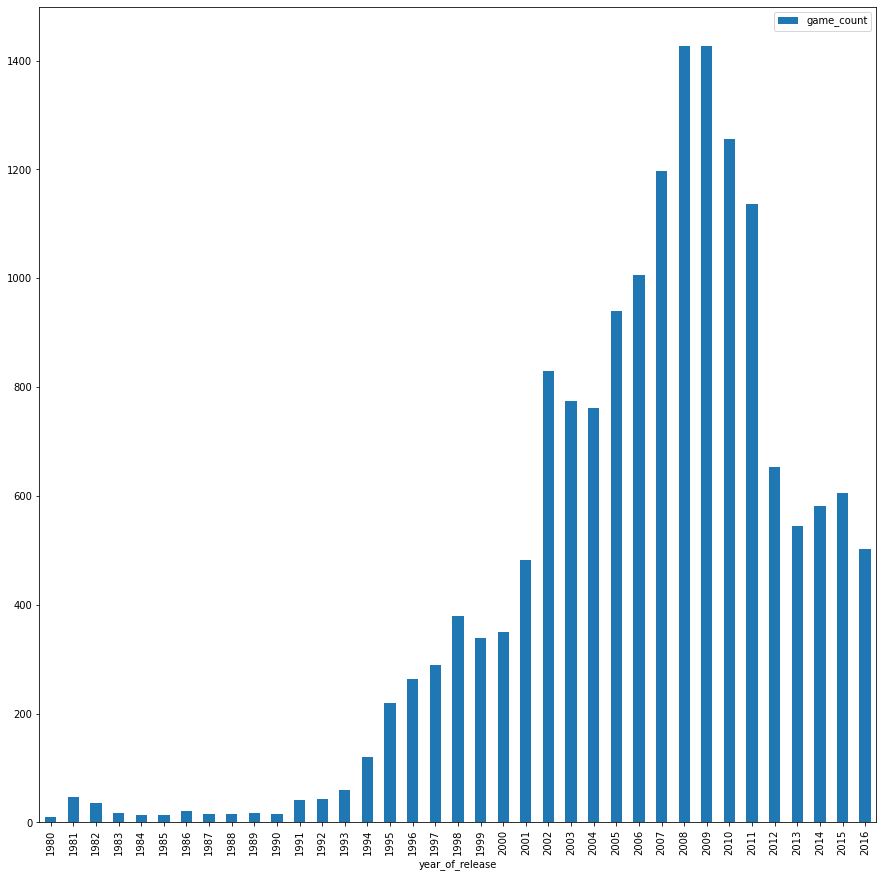

In [11]:
game_per_year.plot(kind='bar', figsize=(15,15))

In [12]:
game_per_year.describe()

,game_count
count,37.000000
mean,444.432432
std,451.604334
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


До 1994 производилось очень небольшое кол-во игр в год, для анализа эти года не несут какой-либо полезной информации, поэтому удалим их.
Пик производительности в игровой индустрии можно наблюдать в 2008 и 2009 годах. Общая тенденция на производство игр наблюдается с начала 00-х. Также, стогит обратить внимание на то, что после 2011-го производительность упала практически в два раза.

<AxesSubplot:xlabel='year_of_release'>

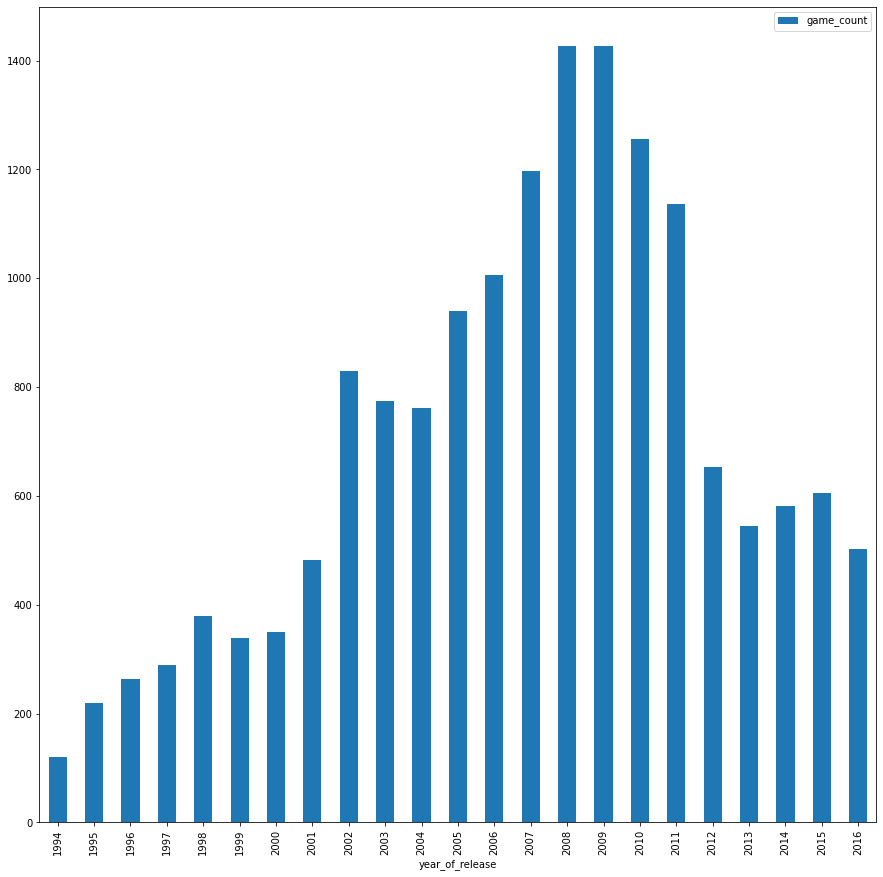

In [13]:
game_per_year = game_per_year.query('game_count > 100')
game_per_year.plot(kind='bar', figsize=(15,15))

,sum_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,30.77


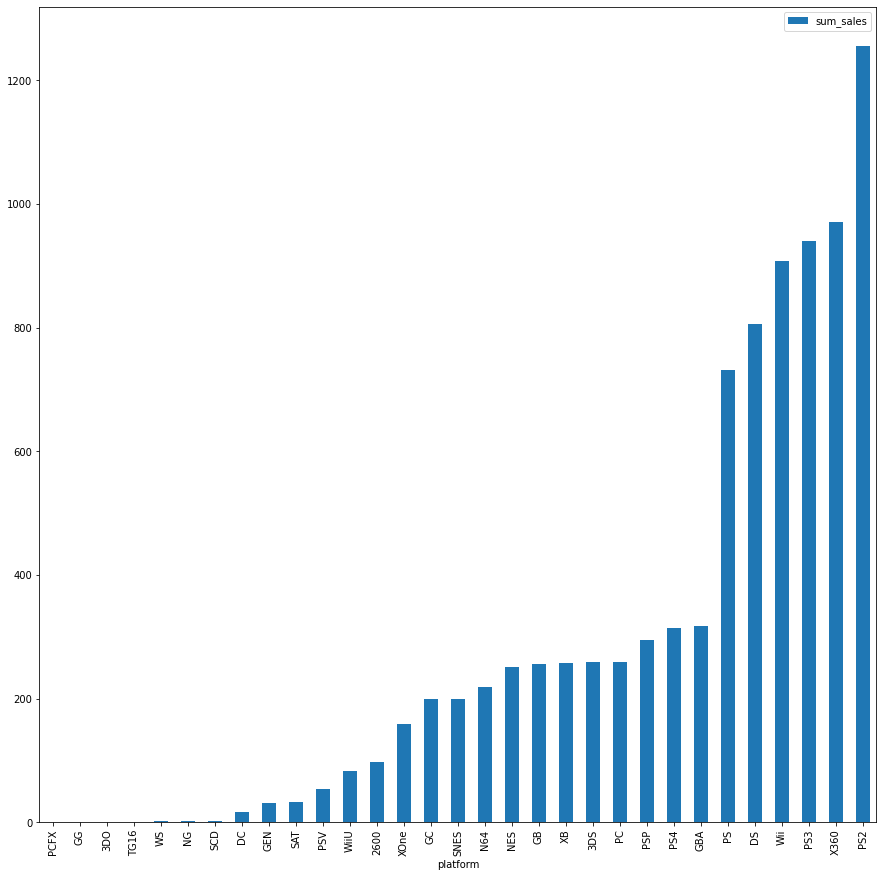

In [14]:
platform_sales = pd.pivot_table(df, index='platform', values='sum_sales', aggfunc='sum')
platform_sales.sort_values('sum_sales', ascending=True, inplace=True)
platform_sales.plot(kind='bar', figsize=(15,15))
platform_sales

Из графика очевидно, что самые большие продажи были у 6-и платформ: ps, ds, wii, ps3, x360, ps2

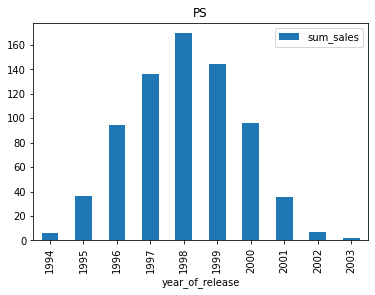

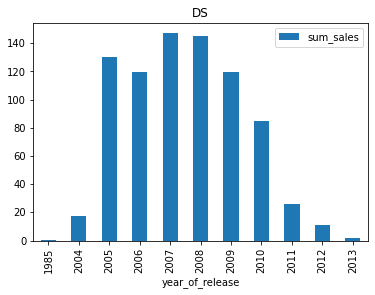

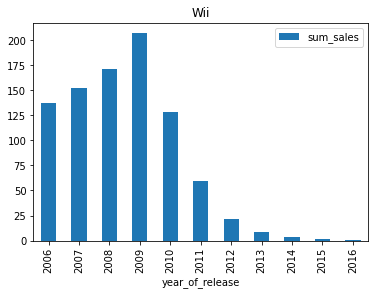

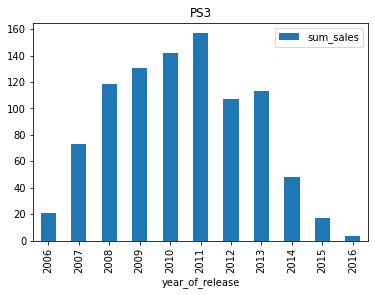

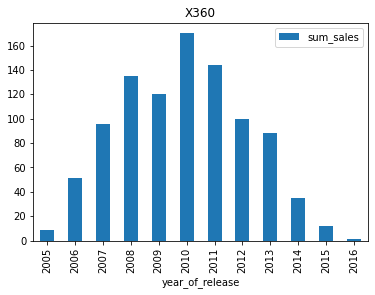

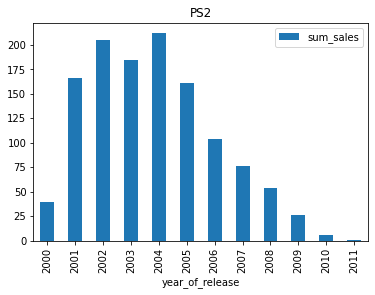

In [15]:
ps = df[['platform', 'year_of_release', 'sum_sales']]
ps = pd.pivot_table(ps, index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum')
ps = ps.loc[platform_sales.tail(6).index][:]
ps = ps.reset_index(level = [1])
for i in ps.index.unique():
    ps.loc[i].plot(kind='bar', x='year_of_release', y='sum_sales', title=i)

Исходя из графиков, можно сказать, что платформы на пике популярности в среднем от 3 до 5 лет(Но есть и такие долгожители, как XBOX 360, который был довольно-таки популярен в течение 7-и лет). Потом производители выпускают новую версию. Это отчетливо видно на графиках платформ PS,PS2,PS3. Первая версия консоли сильно теряет свою популярность в 2001 году, когда PS2 в свою очередь находится практически на пике своей популярности. Далее 2007 - спад у PS2 и подъем у PS3 

In [16]:
actual_data = df[df['year_of_release'] >= 2017-3]
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


Актуальный период получаем следующим образом: год на который хотим сделать прогноз-3 (мин кол-во лет, которое проживет платформа, исходя из предыдущего исследования)

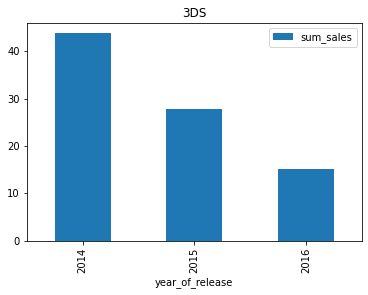

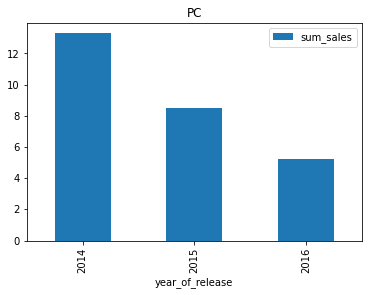

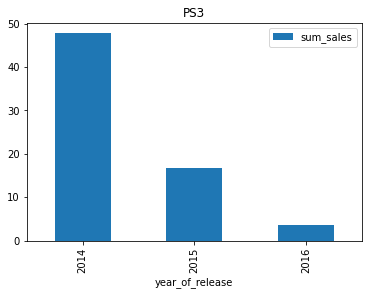

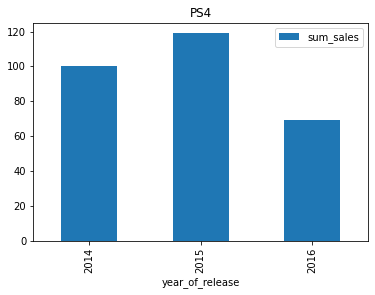

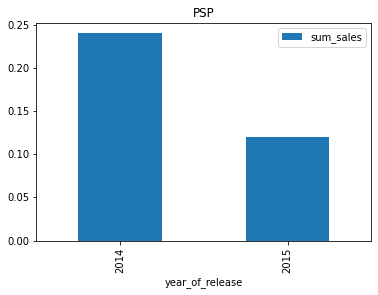

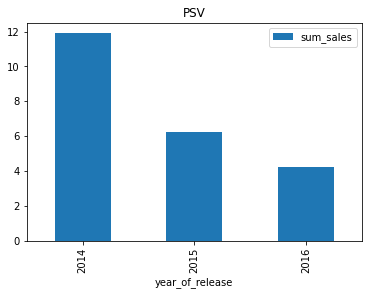

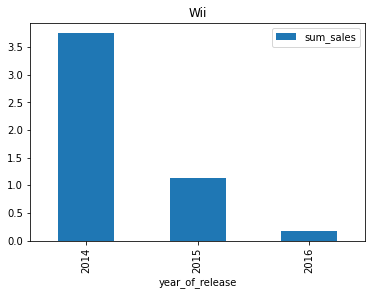

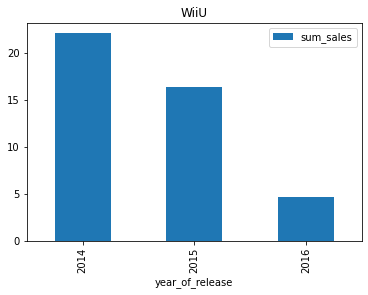

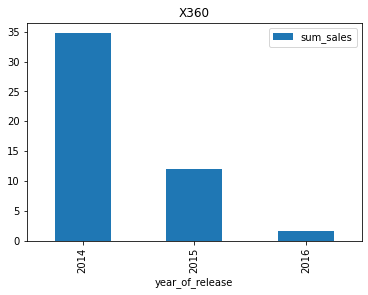

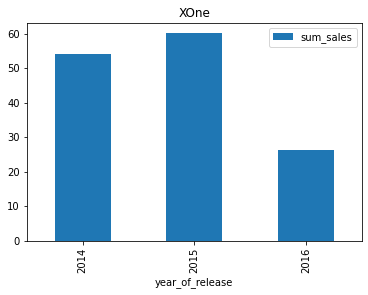

In [17]:
actual_data_platform = pd.pivot_table(actual_data, index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum') \
.reset_index(level = [1])

for i in actual_data_platform.index.unique():
    actual_data_platform.loc[i].plot(kind='bar', x='year_of_release', y='sum_sales', title=i)

Исходя из данных графиков, можно сделать вывод о том, что самыми популярными платформами на актуальный период являются XOne и PS4. Именно эти две платформы лидируют по прадажам. Хотя продажи игр в 2016-м на них упали, по сравнению с 2015-м. (Что может быть связано с тем, что мы имеем неполные данные за 2016-й год). Именно эти платформы потенциально самые прибыльные. 3DS имеет неплохие показатели по сравнению с остальными платформами, но все-равно продажи планомерно падают. PS3, как и ожидалось теряет свою популярность в силу того, что вышло новое поколение этой приставки - PS4. Аналогично с X360 и XOne. Серия Wii планомрно падает, несмотря на выход нового устройства - WiiU. Остальные платформы имеют очень никзие показатели, в них бы я вкладывать не стал.

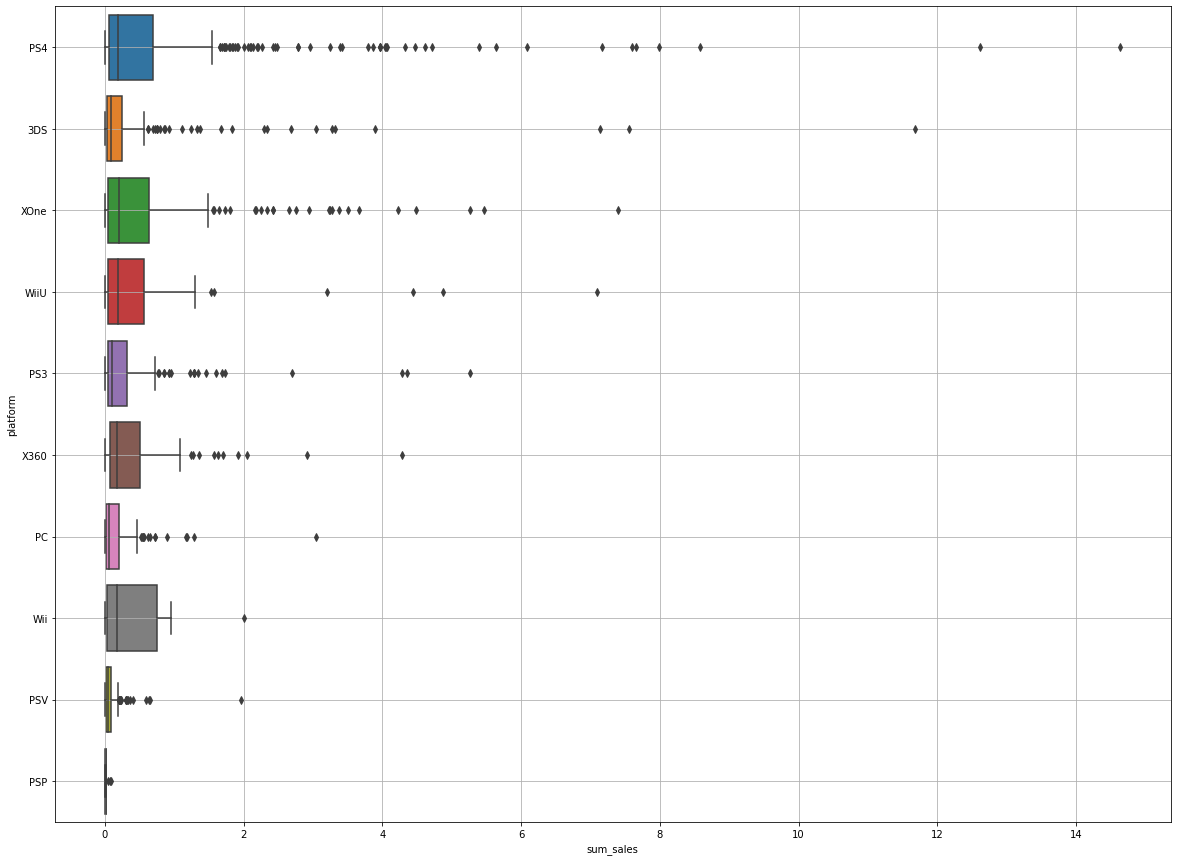

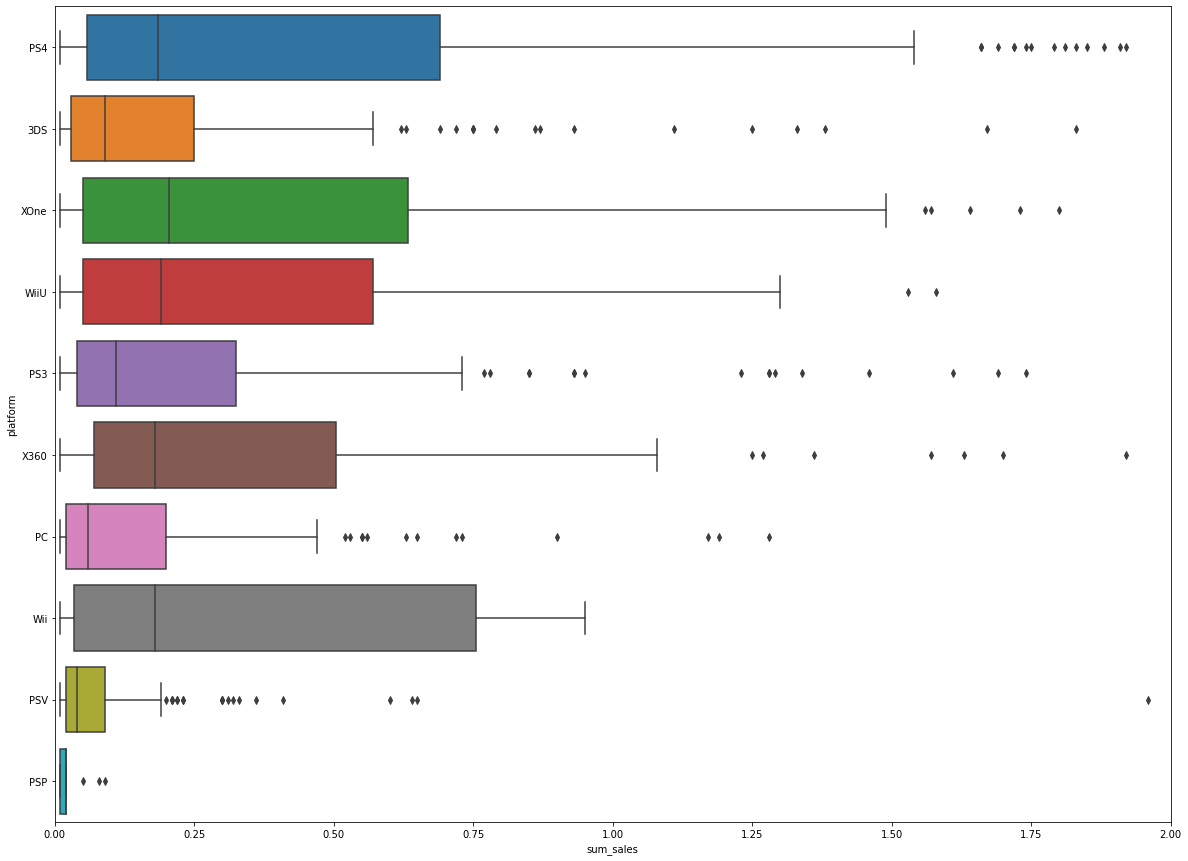

In [18]:
import matplotlib.cm as cm
plt.figure(figsize=(20,15))
sns.boxplot(data=actual_data, x='sum_sales', y='platform')
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
sns.boxplot(data=actual_data, x='sum_sales', y='platform')
plt.xlim(0,2)
plt.show()

Из графика, очевидно, что больше всего продаж на платформах: PS4, XOne, X360, Wii за актуальный период.
Медиана у них находится примерно на одном уровне, разброс намного сильнее по сравнению с остальными платформами. 

In [19]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


Коэффицент корреляции между оценками пользователей и продажами: -0.040131589472697356
Коэффицент корреляции между оценками критиков и продажами: 0.40266141068104083


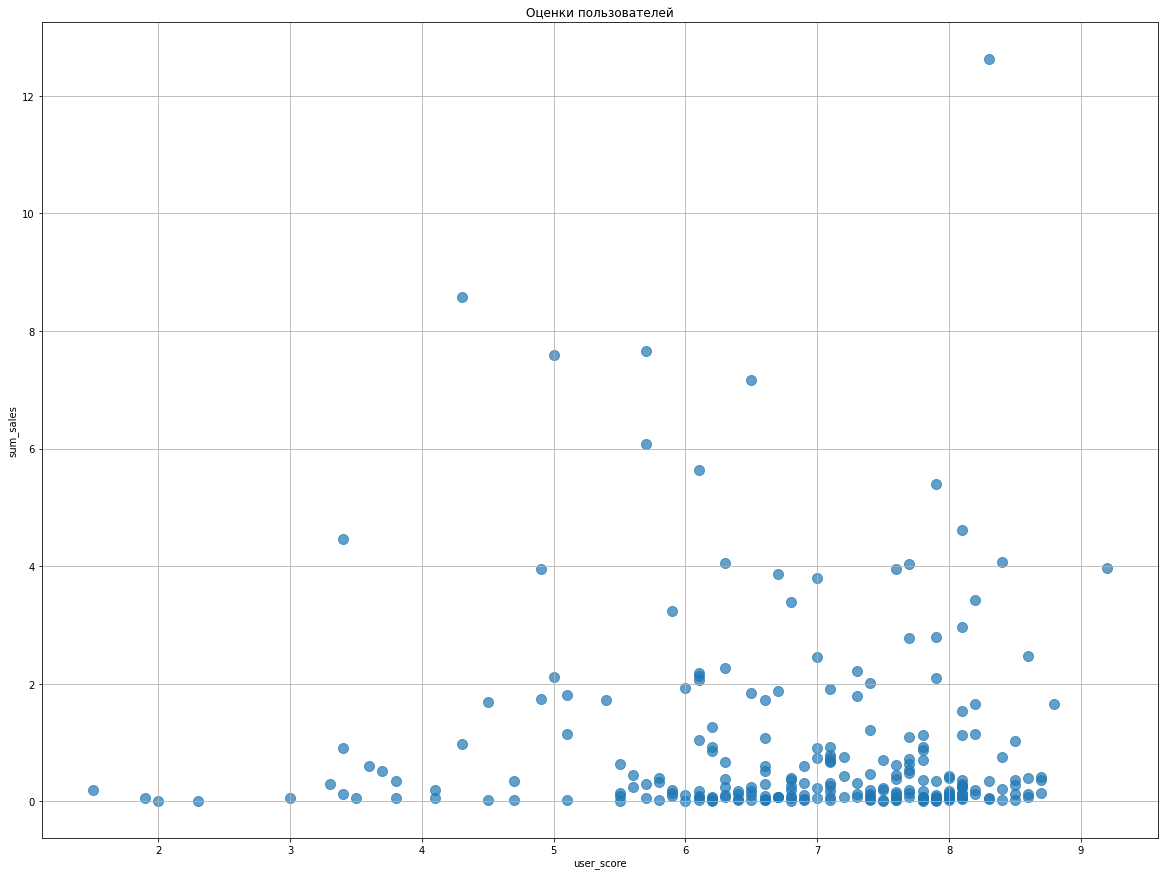

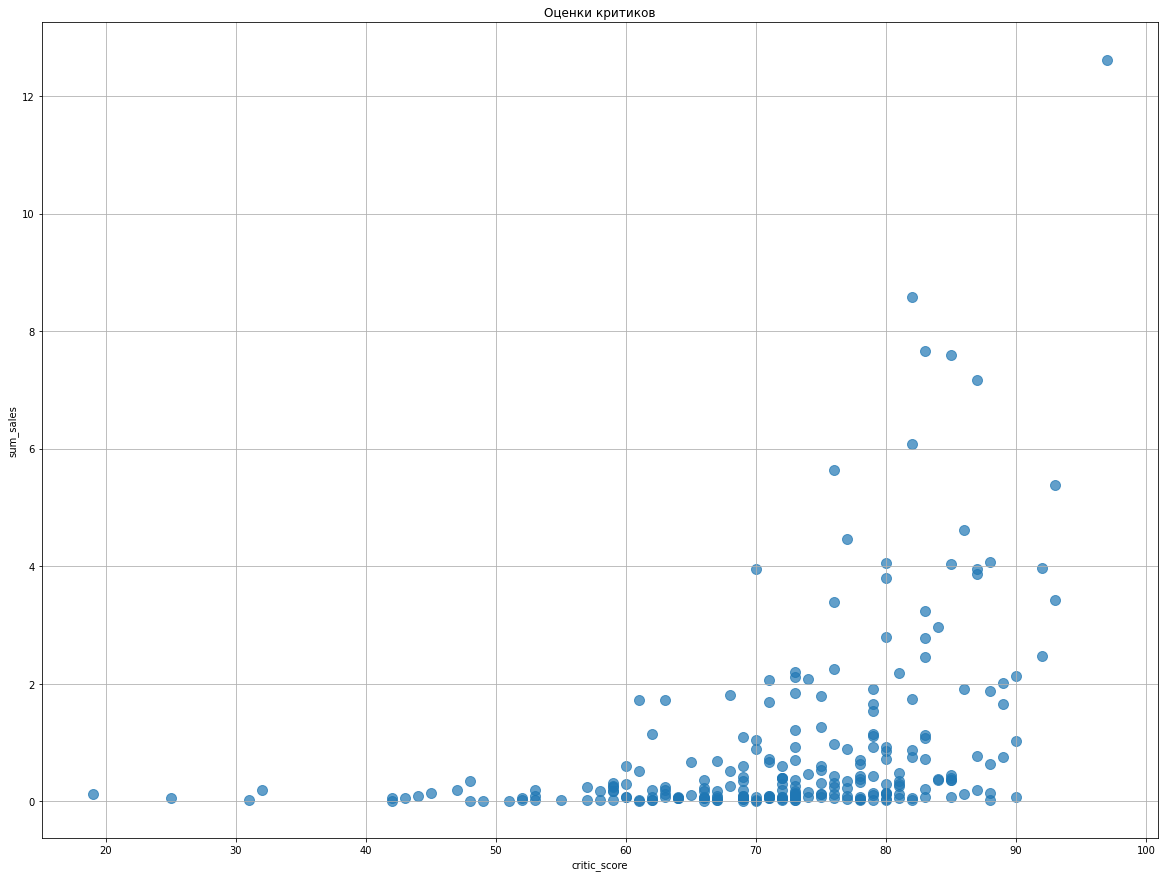

In [20]:
actual_data.query('platform == "PS4"').plot.scatter('user_score','sum_sales', title='Оценки пользователей', \
                                                    grid=True, alpha=0.7, figsize=(20,15), s=100)

print('Коэффицент корреляции между оценками пользователей и продажами:', \
      actual_data.query('platform == "PS4"')['user_score'].corr(actual_data.query('platform == "PS4"')['sum_sales']))

actual_data.query('platform == "PS4"').plot.scatter('critic_score','sum_sales', title='Оценки критиков', \
                                                    grid=True, alpha=0.7, figsize=(20,15), s=100)

print('Коэффицент корреляции между оценками критиков и продажами:', \
      actual_data.query('platform == "PS4"')['critic_score'].corr(actual_data.query('platform == "PS4"')['sum_sales']))

Исходя из полученых результатов, можно сделать вывод о том, что зависимости между оценками пользователей(критиков) и продажами - нет.
Но стоит добавить, что p-value соотношения оценки критиков/продажи в 10 раз больше соотношения оценки пользователей/продажи. Возможно все-таки зависимость между прибылью и оценками критиков есть, но она очень слабая.

Данные для Wii и PSP содержат небольшое кол-во нужных нам для исследования значений, поэтому их можно удалить, иначе получаются некорректные результаты именно для этих платформ

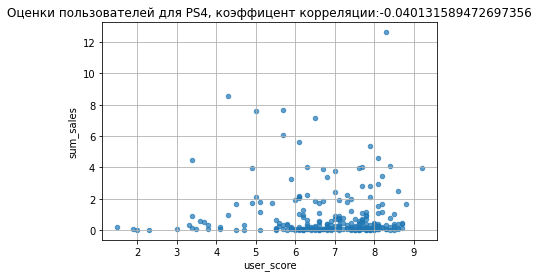

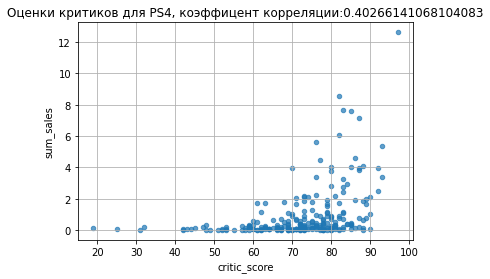

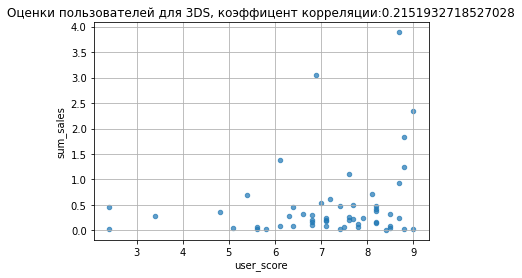

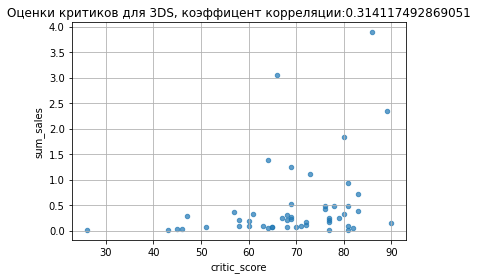

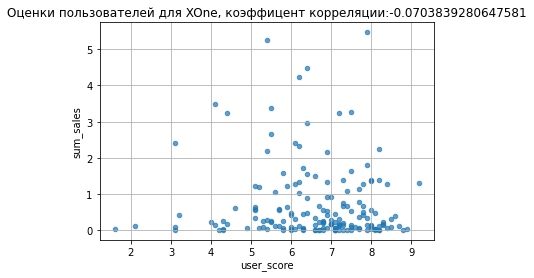

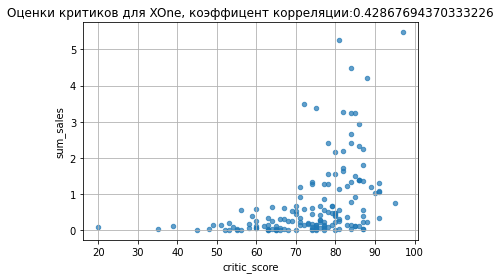

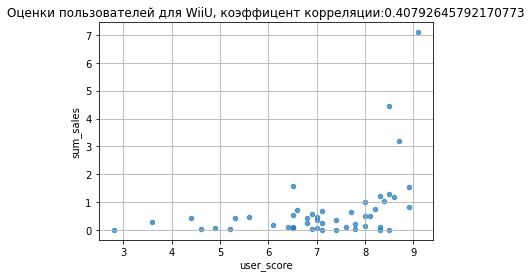

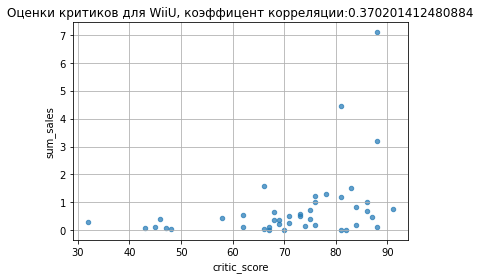

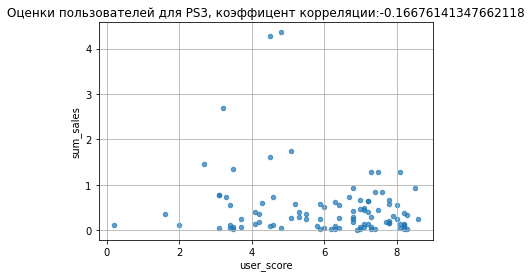

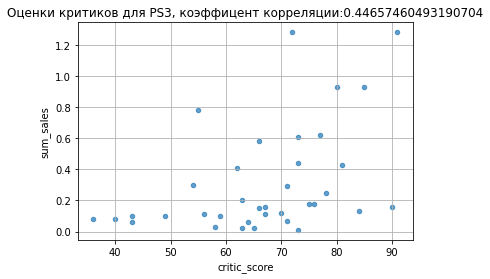

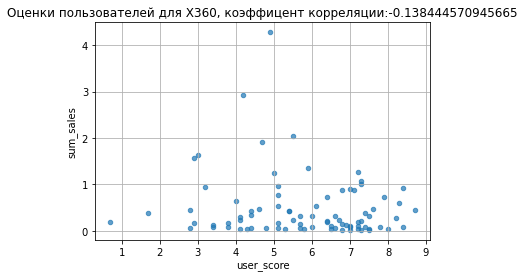

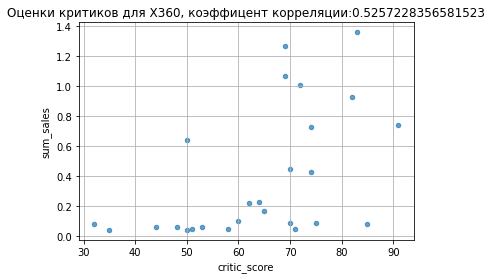

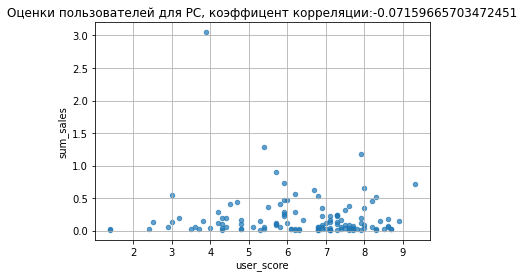

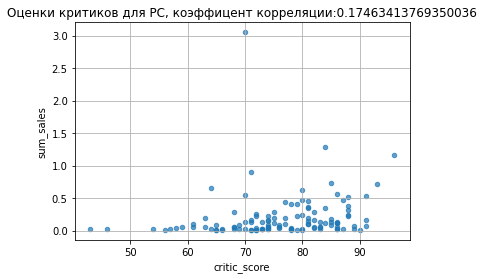

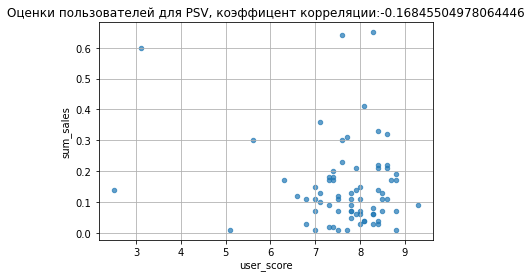

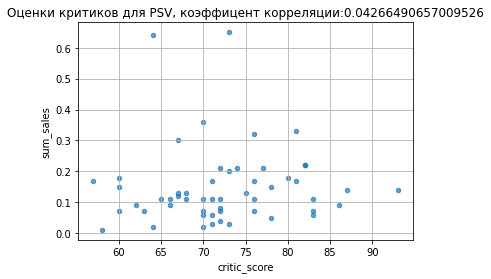

In [21]:
actual_data = actual_data.query('platform != "Wii" & platform != "PSP"')

for i in actual_data['platform'].unique():
    r = actual_data.query('platform == @i')['user_score'].corr(actual_data.query('platform == @i')['sum_sales'])
    actual_data.query('platform == @i').plot.scatter('user_score','sum_sales',  title='Оценки пользователей для '+i+', коэффицент корреляции:'+str(r), grid=True, alpha=0.7)
    r = actual_data.query('platform == @i')['critic_score'].corr(actual_data.query('platform == @i')['sum_sales'])
    actual_data.query('platform == @i').plot.scatter('critic_score','sum_sales', title='Оценки критиков для '+i+', коэффицент корреляции:'+str(r), grid=True, alpha=0.7)

Для остальных платформ мы видим схожие результаты. За исключением некоторых скачков коэффицента корреляции для соотношения оценки пользователей/продажи на платформах 3DS, WiiU

In [22]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


<AxesSubplot:title={'center':'Кол-во игр по жанрам'}, xlabel='genre'>

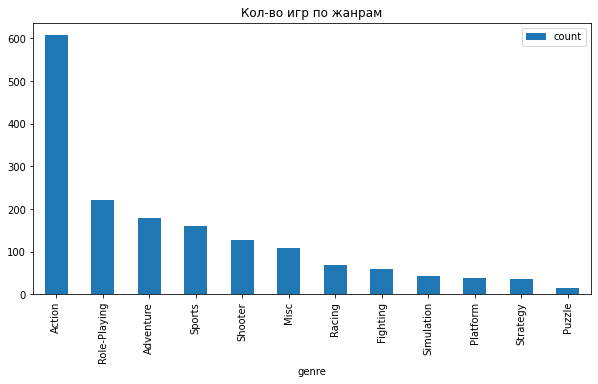

In [23]:
(pd.pivot_table(actual_data, index='genre', values='name', aggfunc='count')
 .rename(columns={'name':'count'})
 .sort_values(by='count', ascending=False)
 .plot(kind='bar', y='count', figsize=(10,5), title='Кол-во игр по жанрам')
)

<AxesSubplot:title={'center':'Кол-во проданных копий всех игр по жанрам'}, xlabel='genre'>

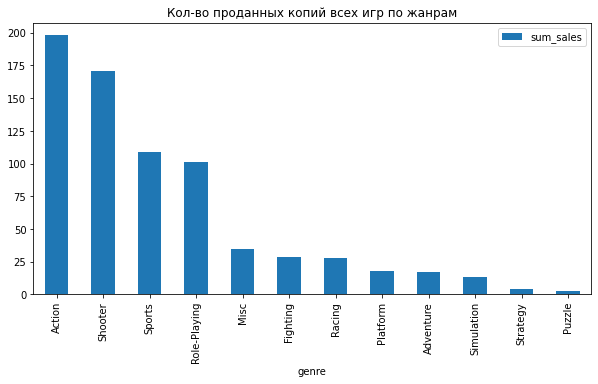

In [24]:
(pd.pivot_table(actual_data, index='genre', values='sum_sales', aggfunc='sum')
 .sort_values(by='sum_sales', ascending=False)
 .plot(kind='bar', y='sum_sales', figsize=(10,5), title='Кол-во проданных копий всех игр по жанрам')
)

<AxesSubplot:title={'center':'Кол-во проданных копий всех игр по жанрам'}, xlabel='genre'>

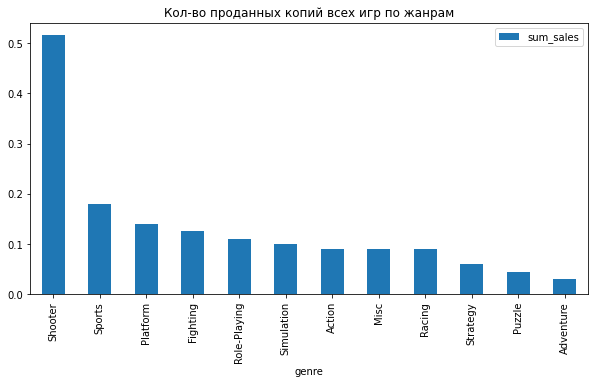

In [25]:
(pd.pivot_table(actual_data, index='genre', values='sum_sales', aggfunc='median')
 .sort_values(by='sum_sales', ascending=False)
 .plot(kind='bar', y='sum_sales', figsize=(10,5), title='Кол-во проданных копий всех игр по жанрам')
)

Из графиков очевидно, что самым популярным и в то же время самым продаваемым жанром является Shooter. Ближайший жанр в рейтинге в два раза менее популярен 

In [26]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


### Составление портрета пользователя каждого региона  

# NA - Северная Америка

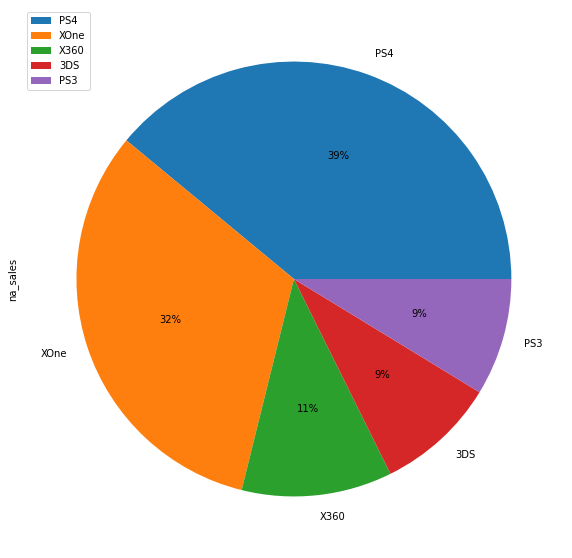

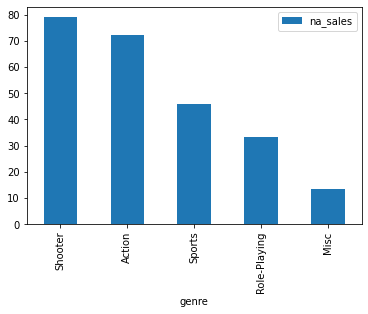

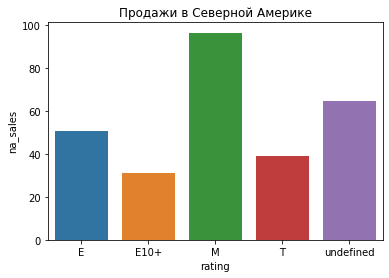

In [27]:
data = pd.pivot_table(actual_data, index='platform', values='na_sales', aggfunc='sum')\
.sort_values('na_sales', ascending=False).head()

data.plot(kind='pie', subplots=True, figsize=(15,10), autopct='%1.0f%%')
plt.show()

data=pd.pivot_table(actual_data, index='genre', values='na_sales', aggfunc='sum')\
.sort_values('na_sales', ascending=False).head()

data.plot(kind='bar')
plt.show()


data = actual_data.groupby('rating')['na_sales'].sum().reset_index()
sns.barplot(x=data['rating'], y=data['na_sales']).set_title('Продажи в Северной Америке')
plt.show()

Самой популярной платфорной в Северной Америке является PS4. Доля этой платформы целых 39%. Но не так уж и далеко ушел и XOne. Его доля состовляет 32%. У остальных платформ доля рынка <11%. XOne и PS4 по отдельности занимают больше рынка, чем все 3 остальные платформы вместе взятые.

Самый популярный жанры - action и shooter. Они сильно преобладают над остальными жанрами. Не сильно далеко ушел жанр sports. Role-Playing в два раза менее популярен, чем action или же Shooter. Самый не популярный жанр среди топ 5 популярных - Misc

По графику 3 видно, что больше всего продаж игр с рейтингом ESRB - M. Это может быть связано с тем, что просто напросто "геймеров" в данном регионе больше всего подходящих именно для данной категории (по возрасту)

# EU - Европа

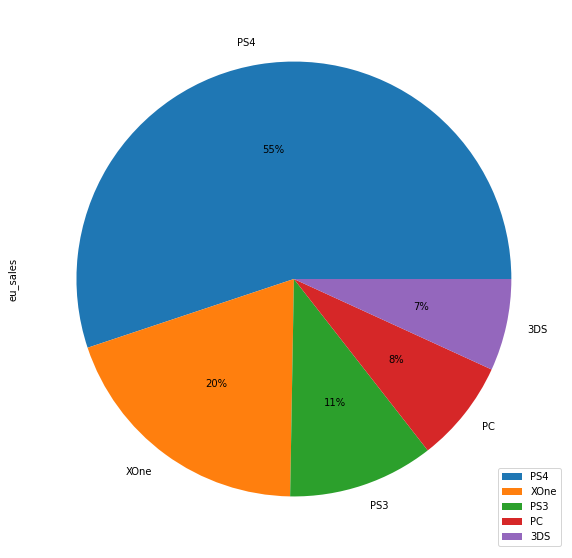

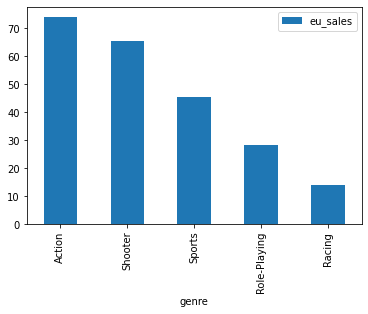

Text(0.5, 1.0, 'Продажи в Европе')

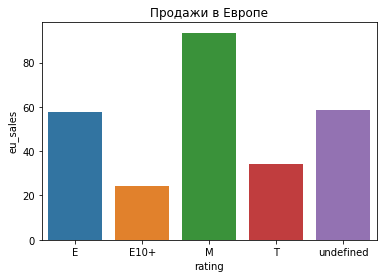

In [28]:
data = pd.pivot_table(actual_data, index='platform', values='eu_sales', aggfunc='sum')\
.sort_values('eu_sales', ascending=False).head()

data.plot(kind='pie', subplots=True, figsize=(15,10), autopct='%1.0f%%')
plt.show()

data=pd.pivot_table(actual_data, index='genre', values='eu_sales', aggfunc='sum')\
.sort_values('eu_sales', ascending=False).head()

data.plot(kind='bar')
plt.show()

data = actual_data.groupby('rating')['eu_sales'].sum().reset_index()
sns.barplot(x=data['rating'], y=data['eu_sales']).set_title('Продажи в Европе')

Самая популярная платформа в Европе - PS4. Она занимает более 55% рынка. Ближайший конкурент XOne занимает всего 20% рынка

Самый популярный жанры, как и в Северной Америке - action и shooter. Они сильно преобладают над остальными жанрами. Не сильно далеко ушел жанр sports. Role-Playing в два раза менее популярен, чем action или же Shooter. Но вот самым не популярным среди топ 5 популярных - Racing

Ровно также, как и в Америке, большая часть игр в Европе имеет рейтинг M. 


# JP - Япония

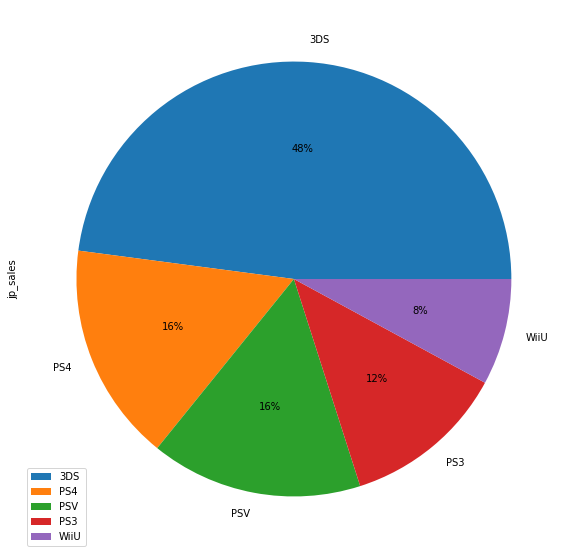

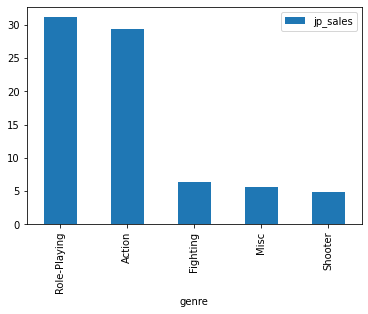

Text(0.5, 1.0, 'Продажи в Японии')

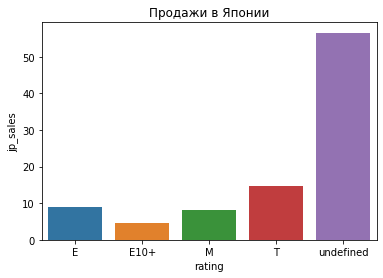

In [29]:
data = pd.pivot_table(actual_data, index='platform', values='jp_sales', aggfunc='sum')\
.sort_values('jp_sales', ascending=False).head()

data.plot(kind='pie', subplots=True, figsize=(15,10), autopct='%1.0f%%')
plt.show()

data=pd.pivot_table(actual_data, index='genre', values='jp_sales', aggfunc='sum')\
.sort_values('jp_sales', ascending=False).head()

data.plot(kind='bar')
plt.show()

data = actual_data.groupby('rating')['jp_sales'].sum().reset_index()
sns.barplot(x=data['rating'], y=data['jp_sales']).set_title('Продажи в Японии')

Показатели в Японии координально отличаются от других двух регионов. Самой популярной платформой здесь является 3DS. Когда топ Европы и Америки здесь имеет всего 16% рынка, когда XOne вообще не попал в рейтинг

Самыми популярными жарнами в Японии являются Role-Playing и Action. Остальные находятся сильно ниже в рейтинге.

И даже тут показатели Японии отличаются от Европы и Америки. Больше всего игр в Японии имеют неопределенный рейтинг. Скорее всего это связано с их местной, собственной компанией, оценивающей игры (CERO).

### Проверка гипотез

In [30]:
from scipy import stats as st

sample_1 = actual_data.query('platform == "XOne"')['user_score'].dropna()
sample_2 = actual_data.query('platform == "PC"')['user_score'].dropna()

alpha = .05

results = st.ttest_ind(
    sample_1,
    sample_2,
    equal_var = False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение:  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Для проверки гипотезы 1 используем H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны. А H1 соответственно - Средние пользовательские рейтинги платформ Xbox One и PC не равны.
Ислледование проводим путем проверки равенства средних двух генеральных совокупностей. Для проверки гипотез, удаляем из выборок оценки со значением NaN

Вывод: У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

In [31]:
sample_1 = actual_data.query('genre == "Action"')['user_score'].dropna()
sample_2 = actual_data.query('genre == "Sports"')['user_score'].dropna()

alpha = .05

results = st.ttest_ind(
    sample_1,
    sample_2,
    equal_var = False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение:  2.132579125573844e-14
Отвергаем нулевую гипотезу


Для проверки гипотезы 1 используем H0 - Средние пользовательские рейтинги жанров Action и Sports равны. А H1 соответственно - Средние пользовательские рейтинги жанров Action и Sports разные. Ислледование проводим путем проверки равенства средних двух генеральных совокупностей. Для проверки гипотез, удаляем из выборок оценки со значением NaN

Вывод: У нас есть оснований утверждать, что средние пользовательские рейтинги жанров Action и Sports различаются.

### Общий вывод

# Таким образом, я выполнил следующие этапы:

* Предобработал данные - удалил пропуски и заменил их в нужных местах на необходимые для анализа значения. 
* Рассчитал и добавил результаты в таблицу - добавили столбец с общим кол-ом продаж игр.
* Провел общий анализа - изучили сколько времени живет платформа, подготовили данные для актуального периода, нашли наиболле прибыльные платформы.
* Провел анализ для каждого из регионов по отдельности -  изучили особенности рынка каждого из 3-х региново, подготовили рекомендации для бизнеса.
* Проверил гипотезы.





Оснвными закономерностями, определяющими популярность игры являются следуюшие факторы (на что стоит обратить внимание для создания наиболее прибыльного продукта):
* Выбор жанра соответствующего региону.
* Выбор платформы, соответствующей региону, а также время ее актуальности.
* Разработка контента игры, соответствующего наиболее популярному возростному рейтингу в данном регионе.

Рекомендации по каждому из регионов:

* NA - Северная Америка:
 1. Платформа: PS4 или(и) XOne
 2. Жанры: Shooter, Action 
 3. Возростной рейтинг: M
 
 
* EU - Европа:
 1. Платформа: PS4
 2. Жанры: Shooter, Action 
 3. Возростной рейтинг: M
 
 
* JP - Япония: 
 1. Платформа: 3DS
 2. Жанры: Role-Playing, Action 
 3. Возростной рейтинг: undefined (Свой, местный рейтинг)